In [2]:
%config IPCompleter.greedy=True

In [3]:
import pandas as pd
import numpy as np

In [4]:
rating_df = pd.read_csv('ratings.csv')
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movies_df = pd.read_csv('movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movie_rating_df = pd.merge(rating_df,movies_df,how='inner',on='movieId')
movie_rating_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [7]:
movie_rating_df.loc[movie_rating_df['movieId'] == 1]

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
210,606,1,2.5,1349082950,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
211,607,1,4.0,964744033,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
212,608,1,2.5,1117408267,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
213,609,1,3.0,847221025,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
movie_rating_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
ratings_df = pd.DataFrame(movie_rating_df.groupby('title')['rating'].mean())
ratings_df.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [10]:
ratings_df['no_of_ratings'] = pd.DataFrame(movie_rating_df.groupby('title')['rating'].count())
ratings_df

,rating,no_of_ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


In [24]:
import matplotlib as plt

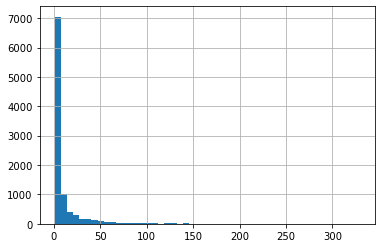

In [23]:
ratings_df['no_of_ratings'].hist(bins=50)

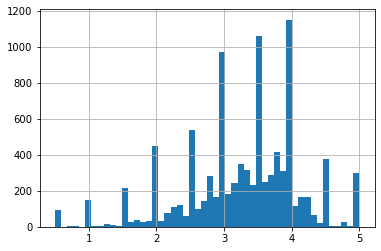

In [22]:
ratings_df['rating'].hist(bins= 50)

In [25]:
import seaborn as sns

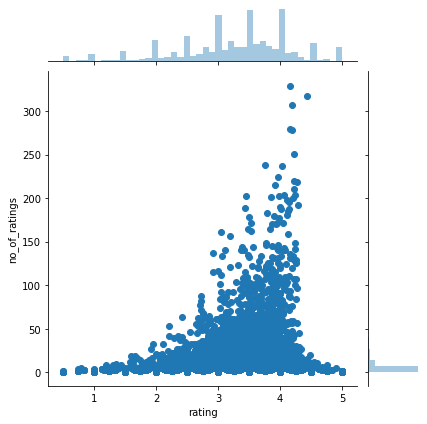

In [26]:
sns.jointplot(x = 'rating', y = 'no_of_ratings', data = ratings_df)

In [29]:
mr_matrix = movie_rating_df.pivot_table(index = 'userId', columns='title',values='rating')
mr_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [136]:
ratings_df.sort_values('no_of_ratings', ascending=False)

,rating,no_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
...,...,...
King Solomon's Mines (1950),3.000000,1
King Solomon's Mines (1937),2.500000,1
King Ralph (1991),1.500000,1


In [147]:
test_movie = mr_matrix['xXx (2002)']


In [148]:
test_similar = mr_matrix.corrwith(test_movie)
test_similar

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.762493
xXx (2002)                                   1.000000
xXx: State of the Union (2005)               0.943880
¡Three Amigos! (1986)                        0.500000
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [149]:
test_similar_df = pd.DataFrame(test_similar, columns=['similarity'])
test_similar_df.dropna(inplace = True)
test_similar_df

,similarity
title,
(500) Days of Summer (2009),0.831858
10 Cloverfield Lane (2016),0.802955
10 Items or Less (2006),1.000000
10 Things I Hate About You (1999),0.540062
"10,000 BC (2008)",0.177325
...,...
[REC]² (2009),-1.000000
eXistenZ (1999),0.762493
xXx (2002),1.000000


In [150]:
#run previous before this
test_similar_df = test_similar_df.join(ratings_df['no_of_ratings'])
test_similar_df

,similarity,no_of_ratings
title,,
(500) Days of Summer (2009),0.831858,42
10 Cloverfield Lane (2016),0.802955,14
10 Items or Less (2006),1.000000,3
10 Things I Hate About You (1999),0.540062,54
"10,000 BC (2008)",0.177325,17
...,...,...
[REC]² (2009),-1.000000,3
eXistenZ (1999),0.762493,22
xXx (2002),1.000000,24


In [151]:
test_similar_df = test_similar_df[test_similar_df['no_of_ratings'] > 50]
test_similar_df

,similarity,no_of_ratings
title,,
10 Things I Hate About You (1999),0.540062,54
12 Angry Men (1957),0.512989,57
2001: A Space Odyssey (1968),0.042377,109
28 Days Later (2002),-0.408248,58
300 (2007),0.412861,80
...,...,...
X-Men: The Last Stand (2006),0.067234,52
X2: X-Men United (2003),-0.276665,76
Young Frankenstein (1974),0.816497,69


In [152]:
test_similar_df.sort_values(by = 'similarity', ascending=False).head()

,similarity,no_of_ratings
title,,
"Piano, The (1993)",1.000000,61
Ed Wood (1994),1.000000,70
Donnie Brasco (1997),0.973852,52
Star Trek II: The Wrath of Khan (1982),0.944911,62
Sense and Sensibility (1995),0.899229,67


If user watches "xXx (2002)", next recommendations are "Piano, The (1993)", "Ed Wood (1994)	" , "Donnie Brasco (1997)"
based on item-based collobarative filtering